
<h1> Math 4544 Numerical Analysis Lab</h1>
<h2> Lab 04 <h2>

The Objectives of this weeks lab is to implement and understand linear regression. Linear regression is the most popular regression model. In this model, we wish to predict response to $n$ data points $(x_{1} ,y_{1}),(x_{2} ,y_{2}),......,(x_{n} ,y_{n}) $ by a regression model given by<br>


> $y = a_{0} + a_{1}x $ <br>
where $a_{0}$ and $a_{1}$ are the constants of the regression model.
A measure of goodness of fit, that is, how well $a_{0} + a{1}x$ predicts the response variable
$y$ is the magnitude of the residual $ε_{i}$ at each of the $n$ data points. <br>
> $E_{i} = y_{i} -(a_{0} + a_{1}x_{i}) $ <br>

Ideally, if all the residuals $ε_{i}$  are zero, one may have found an equation in which all
the points lie on the model. Thus, minimization of the residual is an objective of obtaining
regression coefficients. The most popular method to minimize the residual is the least squares methods, where the estimates of the constants of the models are chosen such that the sum of the
squared residuals is minimized. For more on linear interpolation, please visit the class [lecture.](http://mathforcollege.com/nm/mws/gen/06reg/mws_gen_reg_txt_straightline.pdf) Go to  [matplotlib.pyplot tutorials](https://matplotlib.org/gallery/index.html#pyplot) for all kinds of help regarding plot.  


## Task 01 ##
The torque $T$ needed to turn the torsional spring of a mousetrap through an angle, $Θ$ is given below. . 

| Angle, Θ [radians] |  Torque, T [Nm] |
| --- | --- | 
| 0.698132 | 0.188224 | 
| 0.959931 | 0.209138 | 
| 1.134464 | 230052 | 
| 1.570796 | 0.250965 | 
| 1.919862 | 0.313707 | 




In [0]:
#Dataset description for Task 01
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

theta = np.array([0.698132, 0.959931, 1.134464, 1.570796, 1.919862])
torque = np.array([0.188224, 0.209138, 0.230052, 0.250965, 0.313707])


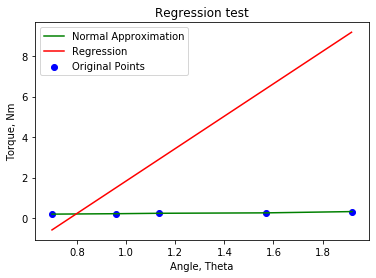

In [0]:

x = theta
y = torque

#Calculating the values of k1 and k2
n = len(x)


mean_x=np.mean(x)
mean_y=np.mean(y)
ss_xy=np.sum(y*x)-n*mean_x*n*mean_y
ss_xx=np.sum(x*x)-n*mean_x*mean_x

k1=ss_xy/ss_xx
k2=mean_y-k1*mean_x


# Taking data points for line plot
thta = sym.symbols('thta')
T = k1 + k2 * thta
x_range = np.arange(start = x[0], stop=x[len(x)-1], step = 0.005 )
y_pred = np.arange(start = x[0], stop=x[len(x)-1], step = 0.005 )
m=len(x_range)
for i in range(m):
    y_pred[i] = T.subs(thta, x_range[i])

# Comparative plotting
plt.scatter(x,y, label='Original Points', color = 'b')
plt.plot(x,y, label = 'Normal Approximation', color='g')
plt.plot(x_range, y_pred, label = 'Regression', color = 'r')
plt.title('Regression test')
plt.xlabel('Angle, Theta')
plt.ylabel('Torque, Nm')
plt.legend()
plt.show()


## Task 02 ##
To find the longtidinal modulous of a composite materials, the follwoing data, as given in the table is collected.

| Strain [m/m] |  Stress [Pa] |
| --- | --- | 
| 0 | 0 | 
| 0.183 | 306 | 
| 0.36 | 612 | 
| 0.5224 | 917 | 
| 0.702 | 1223 | 
| 0.867 | 1529 | 
| 1.0244 | 1835 | 
| 1.1774 | 2140 | 
| 1.329 | 2446 | 
| 1.479 | 2752 |
| 1.5 | 2767 | 
| 1.56 | 2896 | 

Find the longitudinal modulous $E$ using the regression model  $ σ = Eε$



In [0]:
# Dataset description for Task 02
strain = np.array([0.0000,      1.83e-3,    3.6e-3,  
                   5.324e-3,    7.020e-3,   8.67e-3,
                   1.0244e-2,   1.1774e-2,  1.329e-2,
                   1.479e-2,    1.5e-2,     1.56e-2])

stress = np.array([ 0.000,    3.06e8,     6.12e8, 
                    9.17e8,   1.22e9,     1.529e9, 
                    1.835e9,  2.14e9,     2.446e9,
                    2.752e9,  2.767e9,    2.896e9 ])

The value of E is:  182820907110.36127


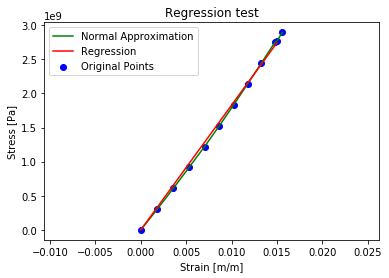

In [0]:
x = strain
y = stress

#Calculating the values of k1 and k2
n = len(x)
x_squared = np.multiply(x,x)
xy = np.multiply(x,y)
E = float(np.sum(xy)/np.sum(x_squared))
print('The value of E is: ' , E)

# Taking data points for line plot
strain = sym.symbols('strain')
T = E * strain
x_range = np.arange(start = x[0], stop=x[len(x)-1], step = 0.005 )
y_pred = np.arange(start = x[0], stop=x[len(x)-1], step = 0.005 )
m=len(x_range)
for i in range(m):
    y_pred[i] = T.subs(strain, x_range[i])



# Comparative plotting

plt.scatter(x,y, label='Original Points', color = 'b')
plt.plot(x,y, label = 'Normal Approximation', color='g')
plt.plot(x_range, y_pred, label = 'Regression', color = 'r')
plt.title('Regression test')
plt.xlabel('Strain [m/m]')
plt.ylabel('Stress [Pa]')
plt.legend()
plt.show()



#

## Task 03 ##
To be able to draw road networks from aerial images, light intensities are measured at different pixel locations. The following intensities are given as a function of pixel location.

|Pixel Location, (k)| Intensity (y)|
|---|---|
|-3|119|
|-2|165|
|-1|231|
|0|243|
|1|244|
|2|214|
|3|136|

Regress the above data to a second order polynomial given by
$$ y = a_{0} + a_{1}k + a_{2}k^{2}$$

For implementation, use n (order of the polynomial as input and then based on that it should choose the polynomial to fit. )

In [0]:
# Solution Code:
# Using the nth polynomial regressor created above by the name nonlinear_polynomial()

k = np.array([-3,-2,-1,0,1,2,3])
y = np.array([119,165,231,243,244,214,136])


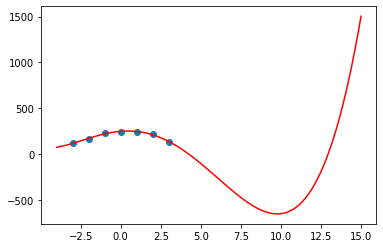

In [0]:
#Your solution goes here.. 


def polynoimal(k,y,n):
  mymodel = np.poly1d(np.polyfit(k, y, n))

  myline = np.linspace(-4, 15,100)

  plt.scatter(k, y)
  plt.plot(myline, mymodel(myline),color="red")
  plt.show()

polynoimal(k,y,4)

### Observations ##

Regression coefficient is a statistical measure of the average functional relationship between two or more variables. In regression analysis, one variable is considered as dependent and other(s) as independent. Thus, it measures the degree of dependence of one variable on the other(s). Regression coefficient was first used for estimating the relationship between the heights of fathers and their sons.<br>
<br>
1. It is denoted by b or a.

2. It is expressed in terms of original unit of data.

3. Between two variables (say x and y), two values of regression coefficient can be obtained. One will be obtained when we consider x as independent and y as dependent and the other when we consider y as independent and x as dependent. The regression coefficient of y on x is represented as byx and that of x on y as bxy.

4. Both regression coefficients must have the same sign. If byx is positive, bxy will also be positive and vice versa.

 5.If one regression coefficient is greater than unity, then the other regression coefficient must be lesser than unity.